In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
train_images, test_images = train_images/255.0, test_images/255.0

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

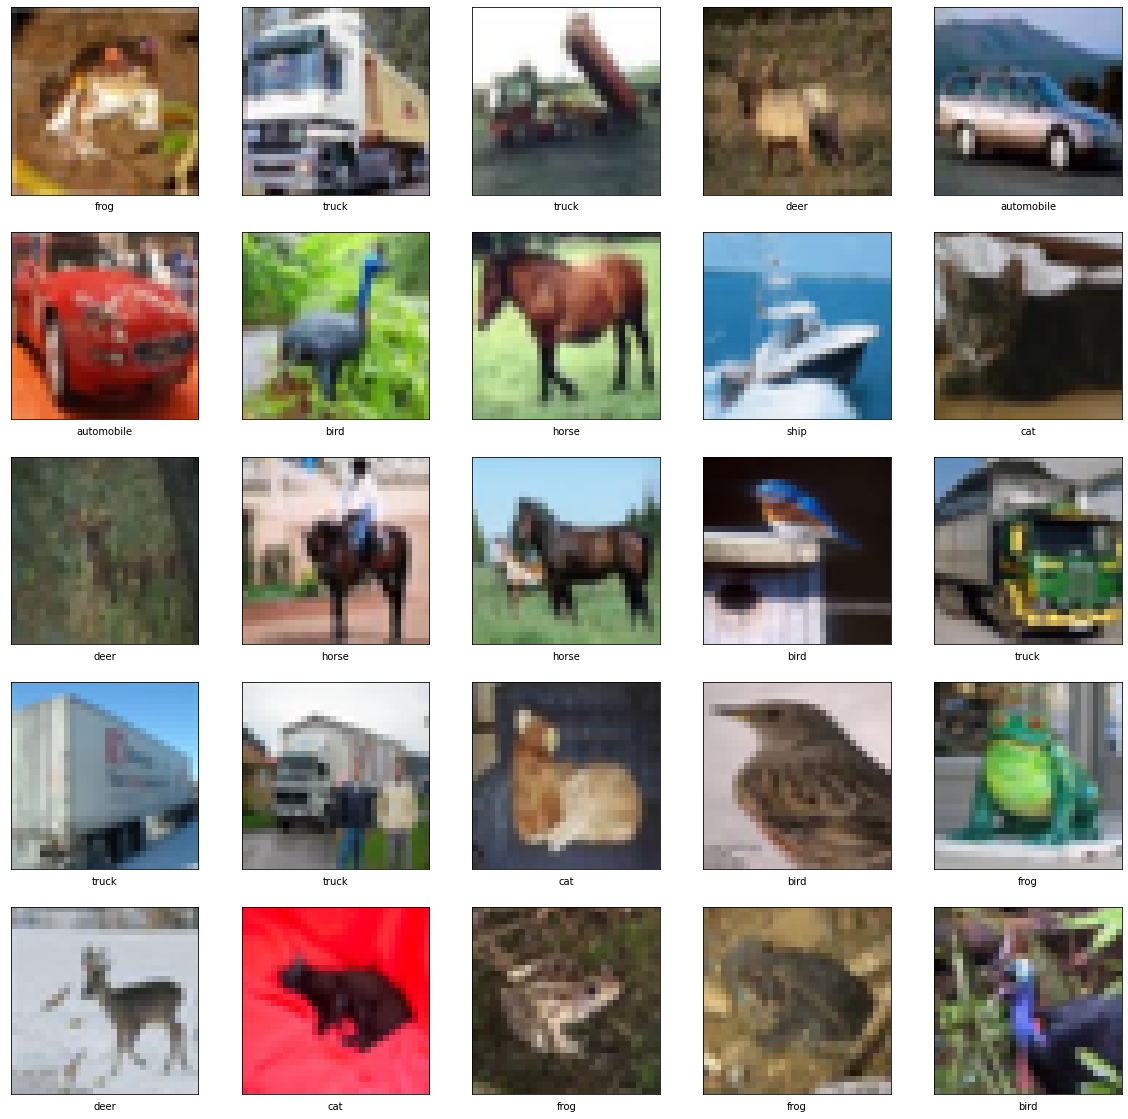

In [ ]:
plt.figure(figsize = (20, 20))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(20, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(40, (3, 3), activation = 'relu'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 10)        280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 10)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 20)        1820      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 20)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 40)          7240      
                                                                 
Total params: 9,340
Trainable params: 9,340
Non-traina

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 10)        280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 10)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 20)        1820      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 20)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 40)          7240      
                                                                 
 flatten_2 (Flatten)         (None, 640)              

In [ ]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs = 10,
                    validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.0117 - accuracy: 0.6458 - val_loss: 1.0370 - val_accuracy: 0.6359
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9712 - accuracy: 0.6604 - val_loss: 1.0510 - val_accuracy: 0.6307
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9386 - accuracy: 0.6735 - val_loss: 1.0188 - val_accuracy: 0.6456
Epoch 4/10
1563/1563 [==============================] - 41s 27ms/step - loss: 0.9100 - accuracy: 0.6821 - val_loss: 1.0198 - val_accuracy: 0.6482
Epoch 5/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8777 - accuracy: 0.6923 - val_loss: 1.0298 - val_accuracy: 0.6428
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8537 - accuracy: 0.7016 - val_loss: 0.9673 - val_accuracy: 0.6657
Epoch 7/10
1563/1563 [==============================] - 45s 28ms/step - loss: 0.8278 - accuracy: 0.7091 - val_loss: 0.9903 -

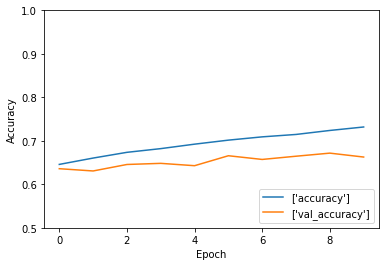

In [ ]:
plt.plot(history.history['accuracy'], label = ['accuracy'])
plt.plot(history.history['val_accuracy'], label = ['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 1.0057 - accuracy: 0.6627


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(8, (5, 5), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size = (5, 5), strides = (2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation = 'relu'))
model.add(layers.Dense(84, activation = 'relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 8)         608       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 10, 10, 16)        1168      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

In [ ]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.6156 - accuracy: 0.4085 - val_loss: 1.3847 - val_accuracy: 0.5054
Epoch 2/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.3284 - accuracy: 0.5236 - val_loss: 1.2722 - val_accuracy: 0.5465
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2232 - accuracy: 0.5655 - val_loss: 1.2516 - val_accuracy: 0.5569
Epoch 4/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.1424 - accuracy: 0.5956 - val_loss: 1.1767 - val_accuracy: 0.5835
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0851 - accuracy: 0.6190 - val_loss: 1.1532 - val_accuracy: 0.5975
Epoch 6/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.0365 - accuracy: 0.6339 - val_loss: 1.1028 - val_accuracy: 0.6132
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9961 - accuracy: 0.6495 - val_loss: 1.0880 -

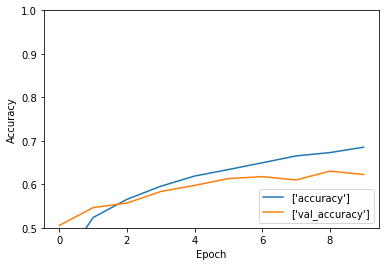

In [ ]:
plt.plot(history.history['accuracy'], label = ['accuracy'])
plt.plot(history.history['val_accuracy'], label = ['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 11ms/step - loss: 1.0956 - accuracy: 0.6225


In [ ]:
train_loss, train_acc = model.evaluate(train_images, train_labels)

1563/1563 [==============================] - 18s 12ms/step - loss: 0.8592 - accuracy: 0.6979
